#### TP0 - 19 marzo 2024
#### Grupo 7:
- Alba Aurora Tove Björkman 65989
- Georg Angelidakis Ellegaard 66760
- Tristan Flechard 66692
- Laurent Foyer 66636

# Preguntas Guı́a
___
## 1. Acerca de pokebolas:
### a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?

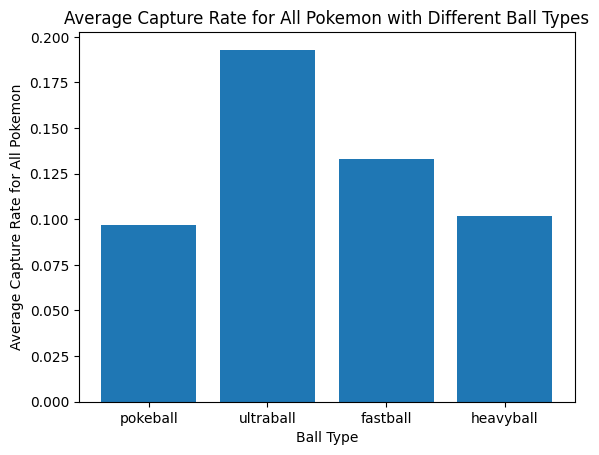

In [84]:
import matplotlib.pyplot as plt
from pokemon import PokemonFactory, StatusEffect
import matplotlib.pyplot as plt
from pokemon import PokemonFactory, StatusEffect
from catching import attempt_catch

factory = PokemonFactory("pokemon.json")
num_attempts = 100
noise_level = 0.15

pokemonName_list = ["snorlax", "jolteon", "caterpie", "onix", "mewtwo"]
ball_types = ['pokeball', 'ultraball', 'fastball' , 'heavyball']

# Create a nested dictionary to store average capture rates for all pokemon and all ball types
average_capture_rates_dict = {pokemon: {ball_type: [] for ball_type in ball_types} for pokemon in pokemonName_list}

# Loop for each pokemon
for pokemon_name in pokemonName_list:
    pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, 1)
    for ball_type in ball_types:
        total_capture_rate = 0
        for _ in range(num_attempts):
            attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
            total_capture_rate += capture_rate
        average_capture_rate = total_capture_rate / num_attempts
        # Append the average capture rate to the appropriate list in the nested dictionary
        average_capture_rates_dict[pokemon_name][ball_type].append(average_capture_rate)

# Calculate the average capture rate for each pokemon and each ball type
average_capture_rates = {pokemon: {ball_type: sum(capture_rates) / len(capture_rates) for ball_type, capture_rates in rates.items()} for pokemon, rates in average_capture_rates_dict.items()}
# Calculate the average capture rate for all pokemons for each ball type
average_capture_rates_all_pokemon = {ball_type: sum([rates[ball_type] for pokemon, rates in average_capture_rates.items()])/len(pokemonName_list) for ball_type in ball_types}

plt.figure()
plt.bar(average_capture_rates_all_pokemon.keys(), average_capture_rates_all_pokemon.values())
plt.xlabel('Ball Type')
plt.ylabel('Average Capture Rate for All Pokemon')
plt.title('Average Capture Rate for All Pokemon with Different Ball Types')
plt.show()

<h3> b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrı́nsecas de cada Pokemon? <h3>




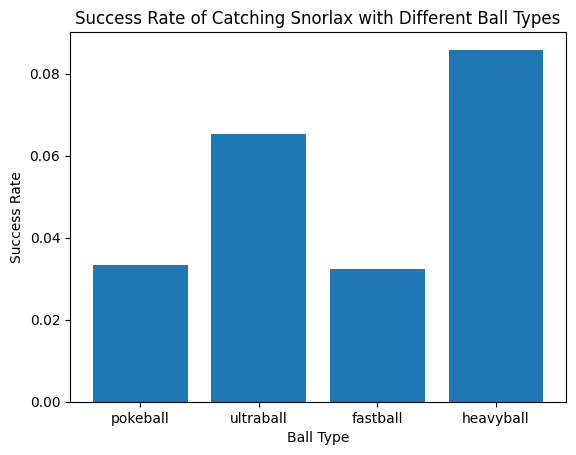

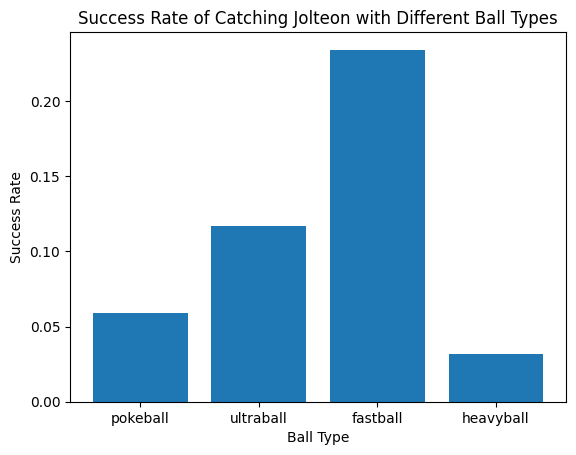

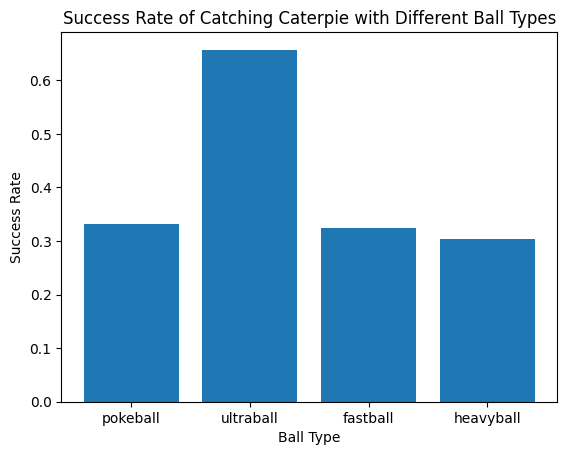

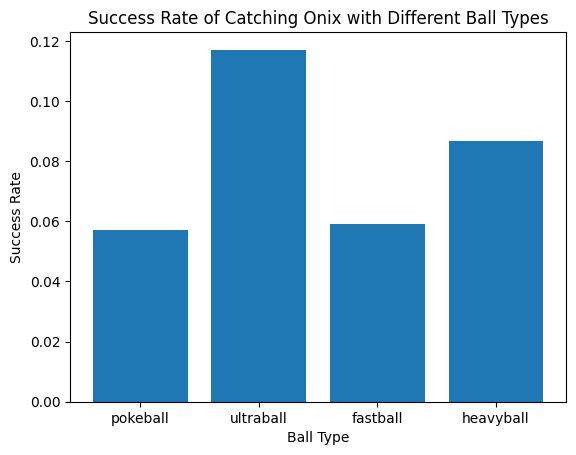

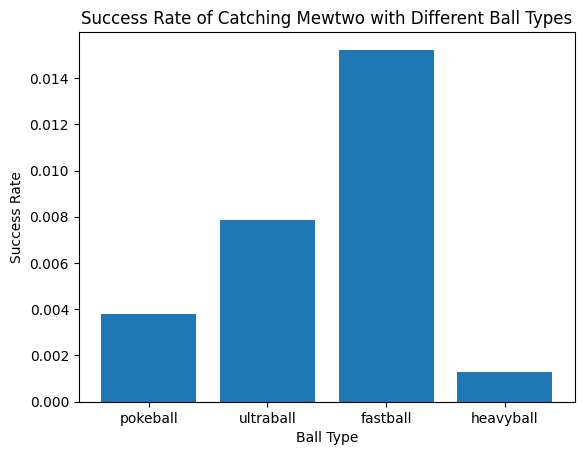

In [85]:
for pokemon, rates in average_capture_rates.items():
    plt.figure()
    plt.bar(rates.keys(), rates.values())
    plt.xlabel('Ball Type')
    plt.ylabel('Success Rate')
    plt.title(f'Success Rate of Catching {pokemon.capitalize()} with Different Ball Types')
    plt.show()

Como se puede ver en los graficos precedentes  hay pokebolas que son mas efectivas con unos pokemons. Por ejemplo Mewto solo se puede atrapar con una fastball, mientras es mas efectivo atrapar Snorlax o Caterpie con ultraballs.

___
## 2. Acerca del estado del Pokemon:
### a) ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es ası́, ¿Cuál es más o menos efectiva?

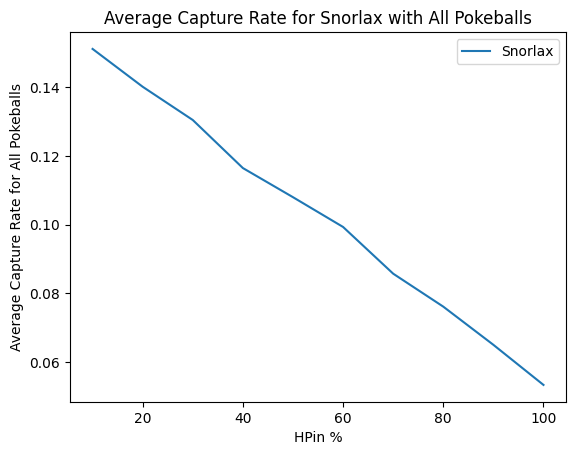

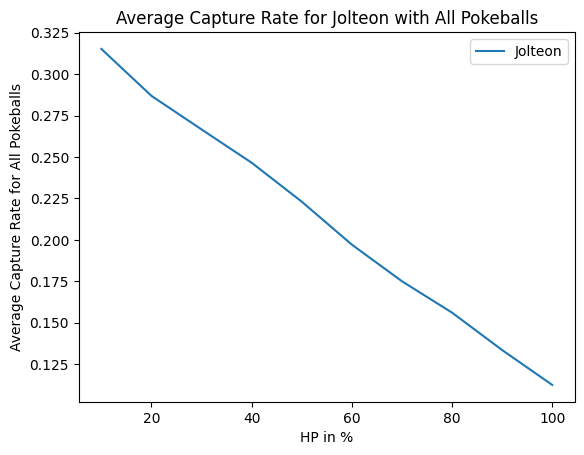

In [86]:
# Create a dictionary to store average capture rates for all pokemon and all HP levels
average_capture_rates_dict = {pokemon: {hp: 0 for hp in range(10, 101, 10)} for pokemon in pokemonName_list}

# Loop for each pokemon
for pokemon_name in pokemonName_list:
    for hp in range(10, 101, 10):
        pokemon = factory.create(pokemon_name,100, StatusEffect.NONE, hp / 100)
        total_capture_rate = 0
        for ball_type in ball_types:
            for _ in range(num_attempts):
                attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
                total_capture_rate += capture_rate
        average_capture_rate = total_capture_rate / (num_attempts * len(ball_types))
        # Store the average capture rate in the dictionary
        average_capture_rates_dict[pokemon_name][hp] = average_capture_rate

# Plot the results for Snorlax
plt.figure()
plt.plot([hp for hp in range(10, 101, 10)], [average_capture_rates_dict['snorlax'][hp] for hp in range(10, 101, 10)], label='Snorlax')
plt.xlabel('HPin %')
plt.ylabel('Average Capture Rate for All Pokeballs')
plt.title('Average Capture Rate for Snorlax with All Pokeballs')
plt.legend()
plt.show()

# Plot the results for Jolteon
plt.figure()
plt.plot([hp for hp in range(10, 101, 10)], [average_capture_rates_dict['jolteon'][hp] for hp in range(10, 101, 10)], label='Jolteon')
plt.xlabel('HP in %')
plt.ylabel('Average Capture Rate for All Pokeballs')
plt.title('Average Capture Rate for Jolteon with All Pokeballs')
plt.legend()
plt.show()

Se puede observar en los gráficos anteriores que el porcentaje de HP es proporcional a la efectividad de captura para los dos Pokémon observados. Cuanto menor sea la cantidad de puntos de vida de un Pokémon, mayor será la efectividad de captura. Sin embargo, la función no es perfectamente lineal debido al ruido (noise level), lo que explicaremos en la siguiente pregunta.

<h3>b) ¿Cómo afectan los puntos de vida a la efectividad de la captura?
Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros
constantes, calcular la probabilidad de captura para distintos HP % </h3>

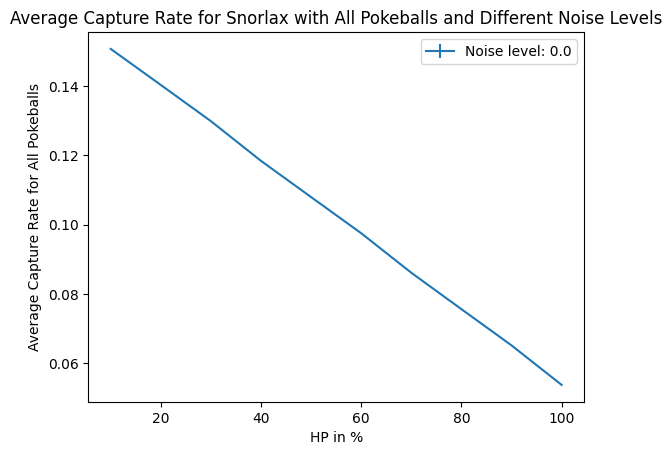

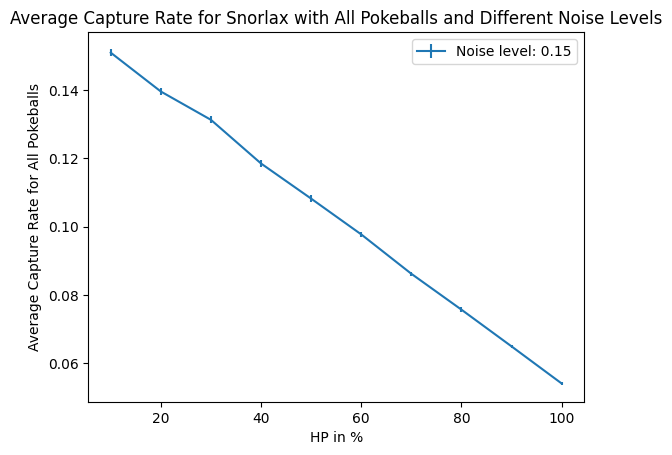

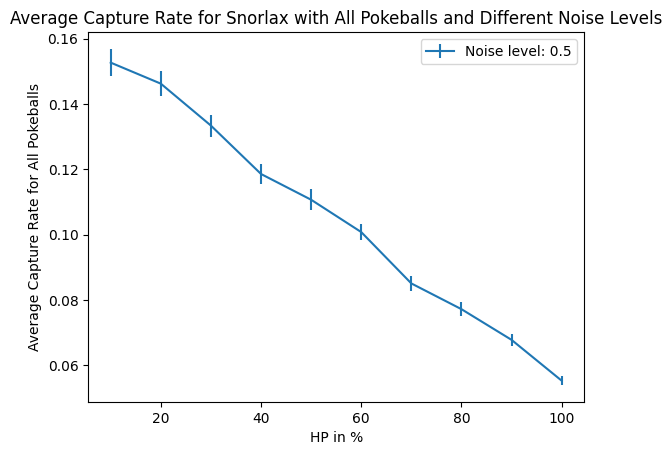

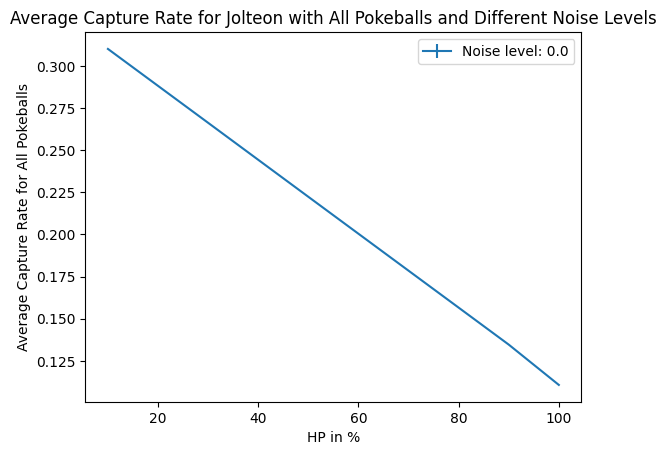

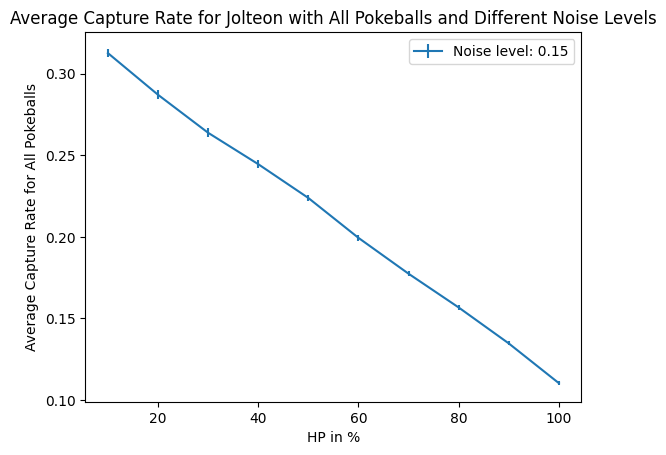

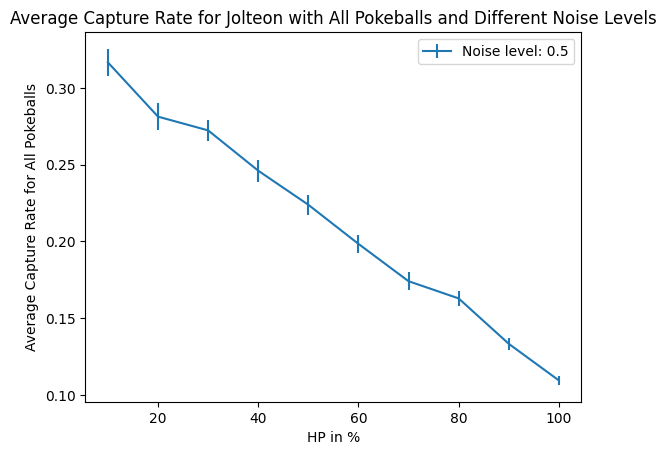

In [87]:
import numpy as np


pokemonName_list = ["snorlax", "jolteon"]
ball_types = ['pokeball', 'ultraball', 'fastball' , 'heavyball']
noise_levels = [0.0,0.15,0.5]

# Create a dictionary to store average capture rates for all pokemon, HP levels, and noise levels
average_capture_rates_dict = {pokemon: {hp: {noise: [] for noise in noise_levels} for hp in range(10, 101, 10)} for pokemon in pokemonName_list}

# Loop for each pokemon
for pokemon_name in pokemonName_list:
    for hp in range(10, 101, 10):
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp / 100)
        for noise_level in noise_levels:
            capture_rates = []
            for _ in range(num_attempts):
                total_capture_rate = 0
                for ball_type in ball_types:
                    attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
                    total_capture_rate += capture_rate
                average_capture_rate = total_capture_rate / len(ball_types)
                capture_rates.append(average_capture_rate)
            # Store the list of capture rates in the dictionary
            average_capture_rates_dict[pokemon_name][hp][noise_level] = capture_rates

# Calculate the mean and standard error of the average capture rates for each pokemon, HP level, and noise level
mean_capture_rates_dict = {pokemon: {hp: {noise: np.mean(rates) for noise, rates in noise_rates.items()} for hp, noise_rates in hp_noise_rates.items()} for pokemon, hp_noise_rates in average_capture_rates_dict.items()}
std_error_dict = {pokemon: {hp: {noise: np.std(rates) / np.sqrt(len(rates)) for noise, rates in noise_rates.items()} for hp, noise_rates in hp_noise_rates.items()} for pokemon, hp_noise_rates in average_capture_rates_dict.items()}


# Plot the results for Snorlax
plt.figure()
for noise_level in noise_levels:
    plt.errorbar([hp for hp in range(10, 101, 10)], [mean_capture_rates_dict['snorlax'][hp][noise_level] for hp in range(10, 101, 10)], yerr=[std_error_dict['snorlax'][hp][noise_level] for hp in range(10, 101, 10)], label=f'Noise level: {noise_level}')
    plt.xlabel('HP in %')
    plt.ylabel('Average Capture Rate for All Pokeballs')
    plt.title('Average Capture Rate for Snorlax with All Pokeballs and Different Noise Levels')
    plt.legend()
    plt.show()

# Plot the results for Jolteon
plt.figure()
for noise_level in noise_levels:
    plt.errorbar([hp for hp in range(10, 101, 10)], [mean_capture_rates_dict['jolteon'][hp][noise_level] for hp in range(10, 101, 10)], yerr=[std_error_dict['jolteon'][hp][noise_level] for hp in range(10, 101, 10)], label=f'Noise level: {noise_level}')
    plt.xlabel('HP in %')
    plt.ylabel('Average Capture Rate for All Pokeballs')
    plt.title('Average Capture Rate for Jolteon with All Pokeballs and Different Noise Levels')
    plt.legend()
    plt.show()


Se puede observar en los gráficos que la variabilidad de la efectividad de captura para un mismo nivel de HP aumenta con diferentes niveles de ruido. Cuando el nivel de ruido es cero, no hay variabilidad y la función es perfectamente lineal, es decir, la efectividad de captura es directamente proporcional al porcentaje de puntos de vida. Sin embargo, a medida que aumenta el nivel de ruido, aparece una variabilidad más grande entre los puntos calculados. Esto se debe a que el nivel de ruido introduce más aleatoriedad en la función de captura de los Pokémon, lo que resulta en una mayor variabilidad en la efectividad de captura para un mismo nivel de HP.


### c) ¿Que parametros son los que mas afectan la probabilidad de captura?


Los parametros que usamos es HP (1-100), Status effect (Poison, Burn, Paralysis, Sleep y None) y level (1-100). Tambien tenemos el noise=0.15. Hacemos 1000 intentos para cada parametro para ver que afectan mas.

Para cada parametro (hp, status, level), variamos la valor guardando los otros dos constantes (100% hp, status NONE, level 100) para observar la desviación de la tasa de captura. Usamos un boxplot para ver el resultado.

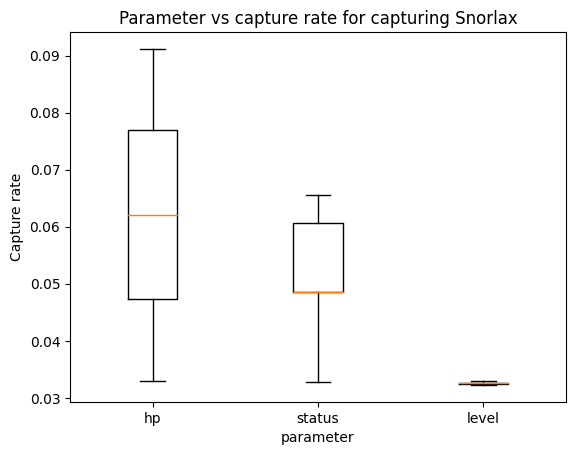

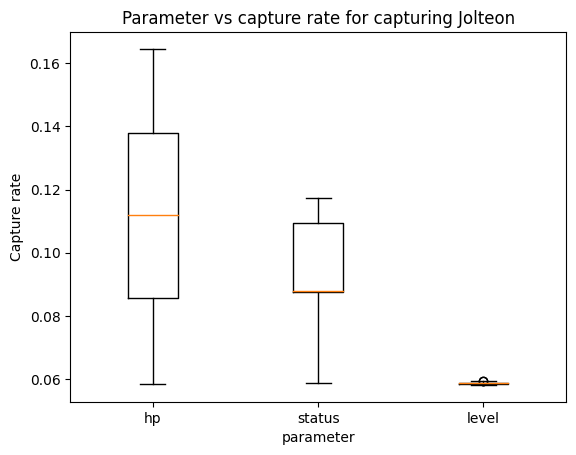

In [88]:
hp_list = np.linspace(0.1, 1, 100)
status_effect_list = [StatusEffect.POISON, StatusEffect.BURN, StatusEffect.PARALYSIS, StatusEffect.SLEEP, StatusEffect.FREEZE, StatusEffect.NONE] 
level_list = np.linspace(1, 100, 100)

def capture_rate(pokemon, pokeball, num_attempts=100):
    """
    Calculate capture rate mean over num_attempts attempts (%)
    """
    capture_rate_sum = 0
    for _ in range(num_attempts):
        _, capture_rate = attempt_catch(pokemon, pokeball, 0.15)
        capture_rate_sum += capture_rate
    return capture_rate_sum/num_attempts

for pokemon_name in pokemonName_list:
    capture_rate_dict = {param: [] for param in ["hp", "status", "level"]}

    # Vary HP
    for hp in hp_list:
        pokemon = factory.create(name=pokemon_name, level=100, status=StatusEffect.NONE, hp_percentage=hp)
        rate = capture_rate(pokemon, 'pokeball', 1000)
        capture_rate_dict["hp"].append(rate)

    # Vary status effect
    for status_effect in status_effect_list:
        pokemon = factory.create(name=pokemon_name, level=100, status=status_effect, hp_percentage=1)
        rate = capture_rate(pokemon, 'pokeball', 1000)
        capture_rate_dict["status"].append(rate)

    # Vary level
    for level in level_list:
        pokemon = factory.create(name=pokemon_name, level=level, status=StatusEffect.NONE, hp_percentage=1)
        rate = capture_rate(pokemon, 'pokeball', 1000)
        capture_rate_dict["level"].append(rate)

    # Boxplot
    plt.boxplot([np.array([capture_rate_dict["hp"]])[0], np.array([capture_rate_dict["status"]])[0], np.array([capture_rate_dict["level"]])[0]])
    plt.xticks([1, 2, 3], ['hp', 'status', 'level'])
    plt.xlabel('parameter')
    plt.ylabel('Capture rate')
    plt.title(f'Parameter vs capture rate for capturing {pokemon.name.capitalize()}')
    plt.show()

Observamos arriba que el parametro HP siempre parece mostrar la desviación la mas significativa; concluimos que este parametro es lo que afecta el mas la probabilidad de captura

<h3>d) Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinacion de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?</h3>

Para identificar que es la combinacion de condiciones la mas convenable para capturar un pokemon, podemos iterar a traves de todas las combinaciones de parametros calculando la tasa de captura:

In [89]:
# Initialize parameter values
pokemon_names = ['snorlax', 'jolteon']
level_list = np.linspace(10, 100, 10)
hp_list = np.linspace(0.1, 1, 10)
status_effect_list = [StatusEffect.POISON, StatusEffect.BURN, StatusEffect.PARALYSIS, StatusEffect.SLEEP, StatusEffect.FREEZE, StatusEffect.NONE] 
pokeball_list = ['pokeball', 'ultraball', 'fastball', 'heavyball']

def capture_rate(pokemon, pokeball, num_attempts=100):
    """
    Calculate capture rate mean over num_attempts attempts (%)
    """
    capture_rate_sum = 0
    for _ in range(num_attempts):
        _, capture_rate = attempt_catch(pokemon, pokeball, 0.15)
        capture_rate_sum += capture_rate
    return capture_rate_sum/num_attempts

def capture_table(pokemon_names, level_list, hp_list, status_effect_list, pokeball_list):
    """
    Iterate through all combinations of parameters for a given level value and calculate success rate
    """
    table = np.empty((0,6))
    for pokemon_name in pokemon_names:
        for level in level_list:
            for hp in hp_list:
                for status_effect in status_effect_list:
                    for pokeball in pokeball_list:
                        pokemon = factory.create(name=pokemon_name, \
                                                 level=level, \
                                                 status=status_effect, \
                                                 hp_percentage=hp)
                        rate = capture_rate(pokemon, pokeball, 1000)
                        table = np.append(table, np.array([[pokemon_name, rate, hp, level, status_effect, pokeball]]), axis=0)
    return table

# Elaborate table containing all combinations
capture_table = capture_table(pokemon_names, level_list, hp_list, status_effect_list, pokeball_list)

print(capture_table)

[['snorlax' 0.137358146271953 0.1 10.0
  <StatusEffect.POISON: ('poison', 1.5)> 'pokeball']
 ['snorlax' 0.2743624458860345 0.1 10.0
  <StatusEffect.POISON: ('poison', 1.5)> 'ultraball']
 ['snorlax' 0.13832105615825122 0.1 10.0
  <StatusEffect.POISON: ('poison', 1.5)> 'fastball']
 ...
 ['jolteon' 0.11724131368799211 1.0 100.0
  <StatusEffect.NONE: ('none', 1)> 'ultraball']
 ['jolteon' 0.2339083099112808 1.0 100.0 <StatusEffect.NONE: ('none', 1)>
  'fastball']
 ['jolteon' 0.03259072530930353 1.0 100.0
  <StatusEffect.NONE: ('none', 1)> 'heavyball']]


Despues, podemos extraer el resultado que tiene la tasa la mas alta:

In [90]:
snorlax_capture_table = capture_table[capture_table[:,0] == 'snorlax']
jolteon_capture_table = capture_table[capture_table[:,0] == 'jolteon']

In [91]:
index = np.argmax(snorlax_capture_table[:, 1])
res = snorlax_capture_table[index]
print('combination #', index)
print('pokemon:', res[0])
print('rate:', res[1])
print('hp:', res[2])
print('level:', res[3])
print('status_effect:', res[4])
print('pokeball:', res[5])

index = np.argmax(jolteon_capture_table[:, 1])
res = jolteon_capture_table[index]
print('\ncombination #', index)
print('pokemon:', res[0])
print('rate:', res[1])
print('hp:', res[2])
print('level:', res[3])
print('status_effect:', res[4])
print('pokeball:', res[5])

combination # 15
pokemon: snorlax
rate: 0.48154264803017915
hp: 0.1
level: 10.0
status_effect: StatusEffect.SLEEP
pokeball: heavyball

combination # 258
pokemon: jolteon
rate: 0.9965849253255672
hp: 0.1
level: 20.0
status_effect: StatusEffect.FREEZE
pokeball: fastball


Los resultados anteriores en teoria deberian ser las combinaciones de parametros mas eficaz para capturar un pokemon (en practica, este resultado puede fluctuar porque no tenemos suficientes muestras para tener un resultado estadísticamente confiable)

### e) A partir del punto anterior, ¿seria efectiva otra combinacion de parametros teniendo en cuenta un nivel del pokemon mas bajo (o mas alto)?

Podemos iterar a traves de los parametros como en la ultima pregunta pero solo para dos parametros de nivel distinctos:
- level = 1 (nivel mas bajo)
- level = 100 (nivel mas alto)

Este ejemplo se hara sobre Snorlax

In [92]:
# Initialize parameter values
pokemon_names = ['snorlax']
hp_list = np.linspace(0.1, 1, 10)
status_effect_list = [StatusEffect.POISON, StatusEffect.BURN, StatusEffect.PARALYSIS, StatusEffect.SLEEP, StatusEffect.FREEZE, StatusEffect.NONE] 
pokeball_list = ['pokeball', 'ultraball', 'fastball', 'heavyball']

def capture_rate(pokemon, pokeball, num_attempts=100):
    """
    Calculate capture rate mean over num_attempts attempts (%)
    """
    capture_rate_sum = 0
    for _ in range(num_attempts):
        _, capture_rate = attempt_catch(pokemon, pokeball, 0.15)
        capture_rate_sum += capture_rate
    return capture_rate_sum/num_attempts

def capture_table(pokemon_names, level_list, hp_list, status_effect_list, pokeball_list):
    """
    Iterate through all combinations of parameters for a given level value and calculate success rate
    """
    table = np.empty((0,6))
    for pokemon_name in pokemon_names:
        for level in level_list:
            for hp in hp_list:
                for status_effect in status_effect_list:
                    for pokeball in pokeball_list:
                        pokemon = factory.create(name=pokemon_name, \
                                                 level=level, \
                                                 status=status_effect, \
                                                 hp_percentage=hp)
                        rate = capture_rate(pokemon, pokeball, 1000)
                        table = np.append(table, np.array([[pokemon_name, rate, hp, level, status_effect, pokeball]]), axis=0)
    return table

# Elaborate table containing all combinations
capture_table_lvl1 = capture_table(pokemon_names, [1], hp_list, status_effect_list, pokeball_list)
capture_table_lvl100 = capture_table(pokemon_names, [100], hp_list, status_effect_list, pokeball_list)

print(capture_table_lvl1, capture_table_lvl100)

[['snorlax' 0.14016899779096326 0.1 1
  <StatusEffect.POISON: ('poison', 1.5)> 'pokeball']
 ['snorlax' 0.2787385681398936 0.1 1
  <StatusEffect.POISON: ('poison', 1.5)> 'ultraball']
 ['snorlax' 0.1389733895507441 0.1 1
  <StatusEffect.POISON: ('poison', 1.5)> 'fastball']
 ...
 ['snorlax' 0.06526643830072051 1.0 1 <StatusEffect.NONE: ('none', 1)>
  'ultraball']
 ['snorlax' 0.03257573612526016 1.0 1 <StatusEffect.NONE: ('none', 1)>
  'fastball']
 ['snorlax' 0.08429991967258364 1.0 1 <StatusEffect.NONE: ('none', 1)>
  'heavyball']] [['snorlax' 0.13584988585517696 0.1 100
  <StatusEffect.POISON: ('poison', 1.5)> 'pokeball']
 ['snorlax' 0.27411444246456945 0.1 100
  <StatusEffect.POISON: ('poison', 1.5)> 'ultraball']
 ['snorlax' 0.13748738683255096 0.1 100
  <StatusEffect.POISON: ('poison', 1.5)> 'fastball']
 ...
 ['snorlax' 0.06505557760114822 1.0 100 <StatusEffect.NONE: ('none', 1)>
  'ultraball']
 ['snorlax' 0.032712412007560074 1.0 100 <StatusEffect.NONE: ('none', 1)>
  'fastball']
 ['s

Extraemos los parametros optimales para el nivel 1 (mas bajo) y 100 (mas alto):

In [93]:
index = np.argmax(capture_table_lvl1[:, 1])
res = capture_table_lvl1[index]
print('combination #', index)
print('pokemon:', res[0])
print('rate:', res[1])
print('hp:', res[2])
print('level:', res[3])
print('status_effect:', res[4])
print('pokeball:', res[5])


index = np.argmax(capture_table_lvl100[:, 1])
res = capture_table_lvl100[index]
print('\ncombination #', index)
print('pokemon:', res[0])
print('rate:', res[1])
print('hp:', res[2])
print('level:', res[3])
print('status_effect:', res[4])
print('pokeball:', res[5])

combination # 19
pokemon: snorlax
rate: 0.48334688309842233
hp: 0.1
level: 1
status_effect: StatusEffect.FREEZE
pokeball: heavyball

combination # 19
pokemon: snorlax
rate: 0.4743924039135523
hp: 0.1
level: 100
status_effect: StatusEffect.FREEZE
pokeball: heavyball


Parece arriba que el nivel no influye suficientemente para que otros parametros seran necesitarios; tanto para el nivel 1 como para el nivel 100, la mejora combinacion de parametros para capturar un Snorlax parece ser:
- hp a su minimo (aqui 10%)
- status FREEZE
- capturado con una heavyball

El impacto del nivel sobre la tasa de captura también no parece muy significativo